**Team Members:**
**Gowtham Arulmozhi, Suriyakrishnan Sathish and Jan Bucher.**

**Team Name: GASJBS**

# AI534 Implementation 1###
**Deadline**: Sunday, Oct. 15, by 11:59pm


**Submission**: Submit 1) your completed notebook in ipynb format, and 2) a PDF export of the completed notebook with outputs.

**Late Submission**: Please see the syllabus for the late submission policy.

In this assignment, we will implement and experiment linear regression to predict the price of a house based on features describing the house, using the housing data that you have explored in the warm up assignment.

We will implement two versions, one using the closed-form solution, and one using gradient descent.

You may modify the starter code as you see fit, including changing the signatures of functions and adding/removing helper functions. However, please make sure that your TA can understand what you are doing and why.

First lets import the necessary packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.metrics import mean_squared_error
# add more imports if necessary

# Part 0: (5 pts) data and preprocessing

---

On canvas, we have provided two different data files for this assignment: ia1_train.csv (for training) and ia1_val.csv(for validation). Download them and upload them to your google drive. Then mount the google drive from your google colab notebook:


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

train_path = '/content/gdrive/My Drive/AI534/ia1_train.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path
val_path = '/content/gdrive/My Drive/AI534/ia1_dev.csv' # DO NOT MODIFY THIS. Please make sure your data has this exact path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now load the training and validation data.

In [ ]:
df_train = pd.read_csv(train_path)
df_val = pd.read_csv(val_path)

In [ ]:
df_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7972604355,5/21/2014,3,1.00,1020,7874,1.0,0,0,3,...,1020,0,1956,0,98106,47.5175,-122.346,1290,7320,2.1800
1,8731951130,6/9/2014,3,2.25,2210,8000,2.0,0,0,4,...,2210,0,1969,0,98023,47.3085,-122.381,1990,8000,2.5025
2,7885800740,2/18/2015,4,2.50,2350,5835,2.0,0,0,3,...,2350,0,2003,0,98042,47.3494,-122.153,3010,5772,2.7000
3,4232900940,5/22/2014,3,1.50,1660,4800,2.0,0,0,3,...,1660,0,1907,0,98119,47.6352,-122.358,1690,4000,9.2630
4,3275850190,9/5/2014,3,2.50,2410,9916,2.0,0,0,4,...,2410,0,1989,0,98052,47.6911,-122.103,2310,8212,7.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4222500410,2/26/2015,4,1.75,2000,7350,1.0,0,0,3,...,1100,900,1963,0,98003,47.3428,-122.303,1720,7350,2.6700
7996,1150700170,9/26/2014,4,2.25,1870,6693,2.0,0,0,3,...,1870,0,1996,0,98003,47.2774,-122.299,1650,6518,2.9900
7997,1959702045,11/19/2014,2,1.00,1240,5500,1.0,0,0,3,...,1240,0,1954,0,98102,47.6461,-122.317,2080,4400,9.0000
7998,7234601221,10/14/2014,3,1.50,1280,2114,1.5,0,0,3,...,1280,0,1904,0,98122,47.6174,-122.308,1540,1456,6.8750


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8000 non-null   int64  
 1   date           8000 non-null   object 
 2   bedrooms       8000 non-null   int64  
 3   bathrooms      8000 non-null   float64
 4   sqft_living    8000 non-null   int64  
 5   sqft_lot       8000 non-null   int64  
 6   floors         8000 non-null   float64
 7   waterfront     8000 non-null   int64  
 8   view           8000 non-null   int64  
 9   condition      8000 non-null   int64  
 10  grade          8000 non-null   int64  
 11  sqft_above     8000 non-null   int64  
 12  sqft_basement  8000 non-null   int64  
 13  yr_built       8000 non-null   int64  
 14  yr_renovated   8000 non-null   int64  
 15  zipcode        8000 non-null   int64  
 16  lat            8000 non-null   float64
 17  long           8000 non-null   float64
 18  sqft_liv

Perform the following preprocessing steps.
1. remove the *ID* column from both training and validation data
2. change *date* into 3 numerical features *day*, *month* and *year*, like in the warm up exercise
3. The feature *yr_renovated* is set to 0 if the house has not been renovated. This creates an inconsistent meaning to the numerical values. Replace it with a new feature called *age_since_renovated*:

>if *yr_renovate* != 0
>> *age_since_renovated* = *year* - *yr\_renovated*  

>otherwise
>> *age\_since\_renovated = year - yr\_built*

4. Normalize all the feautres using z-score normalization based on the training data. Do not normalize *price* as it is the target.
To normalize a feature *x* using z-score normalization, the fomula is

>$z=\frac{x-\mu}{\sigma}$

where $\mu$ and $\sigma$ are the mean and standard deviation of $x$ respectively. The normalized feature will have zero mean and unit standard deviation. Note that you should estimate $\mu$ and $\sigma$ for each feature only using the training data and use the same $\mu$ and $\sigma$ to normalize the features for both training and validation data.




In [ ]:
def preprocess_data(df):

    # Extract day, month, and year components from the 'Date' column
    date_obj = pd.to_datetime(df['date'], format='%m/%d/%Y')
    df['day'] = date_obj.day
    df['month'] = date_obj.month
    df['year'] = date_obj.year

    if df['yr_renovated']!= 0:
      df['age_since_renovated'] = df['year'] - df['yr_renovated']
    else:
      df['age_since_renovated'] = df['year'] - df['yr_built']

    return df

In [ ]:
# Apply the preprocessing function to the DataFrame
df_train = df_train.apply(preprocess_data, axis=1)
df_val = df_val.apply(preprocess_data, axis=1)

df_train = df_train.drop(columns=['id','date','yr_renovated'])
df_val = df_val.drop(columns=['id','date','yr_renovated'])

In [ ]:

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             8000 non-null   int64  
 1   bathrooms            8000 non-null   float64
 2   sqft_living          8000 non-null   int64  
 3   sqft_lot             8000 non-null   int64  
 4   floors               8000 non-null   float64
 5   waterfront           8000 non-null   int64  
 6   view                 8000 non-null   int64  
 7   condition            8000 non-null   int64  
 8   grade                8000 non-null   int64  
 9   sqft_above           8000 non-null   int64  
 10  sqft_basement        8000 non-null   int64  
 11  yr_built             8000 non-null   int64  
 12  zipcode              8000 non-null   int64  
 13  lat                  8000 non-null   float64
 14  long                 8000 non-null   float64
 15  sqft_living15        8000 non-null   i

In [ ]:
df_train.shape, df_val.shape

((8000, 22), (2000, 22))

In [ ]:
X_train = df_train.drop(columns=['price'])
X_val = df_val.drop(columns=['price'])

feature_names = X_train.columns.tolist()

y_train = df_train.price
y_val = df_val.price

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8000, 21), (2000, 21), (8000,), (2000,))

In [ ]:
# Your code goes here

mean = X_train.mean()
std_dev = X_train.std()

def calculate_zscore(X, mean=mean, std=std_dev):
  zscores = (X - mean) / std_dev
  return zscores

In [ ]:

X_train_norm = calculate_zscore(X_train)
X_val_norm = calculate_zscore(X_val)

Let's do a quick testing of your normalization, please
1. Estimate and print the new mean and standard deviation of the normalized features for the training data --- this should be 0 and 1 respectively.  
2. Estimate and print the new mean and standard deviation of the normalized features for the validation data --- these values will not be 0 and 1, but somewhat close

In [ ]:
# Your code goes here

X_train_norm_mean = X_train_norm.mean()
X_train_norm_std = X_train_norm.std()
X_val_norm_mean = X_val_norm.mean()
X_val_norm_std = X_val_norm.std()

mu_sigma = pd.DataFrame([X_train_norm_mean, X_train_norm_std, X_val_norm_mean, X_val_norm_std],
                         index=['X_train_norm_mean', 'X_train_norm_std', 'X_val_norm_mean', 'X_val_norm_std']).T
mu_sigma

,X_train_norm_mean,X_train_norm_std,X_val_norm_mean,X_val_norm_std
bedrooms,1.953993e-16,1.0,0.005582,0.893240
bathrooms,-1.776357e-16,1.0,-0.011648,1.003430
sqft_living,8.704149e-17,1.0,0.013909,0.993781
sqft_lot,-3.552714e-18,1.0,0.005044,0.912514
floors,2.176037e-17,1.0,0.022541,0.992549
waterfront,1.465494e-17,1.0,0.015265,1.088181
view,1.953993e-17,1.0,0.002659,1.025579
condition,1.163514e-16,1.0,-0.055403,0.976223
grade,8.348877e-17,1.0,0.057390,1.033680
sqft_above,-1.030287e-16,1.0,0.028274,0.996623


In [ ]:
len(mu_sigma)

21

In [ ]:
X_train_norm = np.array(X_train_norm)
X_val_norm_std = np.array(X_val_norm)


## ***Question***
Why is it import to use the same $\mu$ and $\sigma$ to perform normalization on the training and validation data? What would happen if we use $\mu$ and $\sigma$ estimated using the validation to perform normalization on the validation data?  


**Answer:**
*Using the same mean (𝜇) and standard deviation (𝜎) for feature normalization on both the training and validation data is crucial to maintain the integrity of the machine learning process. Separate normalization parameters for these datasets can introduce data leakage, where information from the validation set indirectly influences the model's training. This can lead to overly optimistic performance estimates during validation. Furthermore, inconsistent scaling between the two datasets could result in models performing well on one set but poorly on the other. To ensure proper generalization and unbiased evaluation, it is essential to employ the same 𝜇 and 𝜎, estimated from the training data, for feature normalization in both training and validation phases.*

# Part 1 (15 pts) Generate closed-form solution for reference.
Our data now contains 21 numeric features, before we learn a linear regression model using gradient descent, we will first build the closed-form solution as a reference point. So for this part, you need to
1. Implement the close-form solution for linear regression and apply it to the training data to learn the weight vector for your linear regression model.
2. Apply your learned linear regression model to the training data to make predictions for all training examples and report the Mean Squared Error.
3. Apply your learned linear regression model to the validation data to make predictions for all the validation examples and report the mean squared error for the validation data.

Your code should print the weight vector, which has 22 dimensions, one for each feature plus one additional $w_0$.  Your code should also report the MSE for the training and validation data respectively.*italicized text*

In [ ]:
# Your code goes here
class LinearRegression():
  #Co.eff=m ; intercept=b
  def __init__(self):
    self.m = None
    self.b = None
  def fit(self, X_train, y_train):
    X_train = np.insert(X_train, 0, 1, axis=1)
    #Calculating the coefficients
    weights = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
    self.b = weights[0]
    self.m = weights[1:]
    # print(self.b, self.m)
    # print(f"Weights Shape : {weights.shape}")
    return weights

  def predict(self, X):
    return np.dot(X, self.m) + self.b

In [ ]:
def calculate_r_squared(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    ssr = sum((y_true - y_pred) ** 2) # Calculate the sum of squared residuals (SSR)
    sst = sum((y_true - mean_y) ** 2) # Calculate the total sum of squares (SST)
    r_squared = 1 - (ssr / sst)
    return r_squared

def mean_squared(y_true, y_pred):
  return np.mean((y_pred - y_true)**2)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_norm, y_train)


array([ 5.36167284, -0.4132323 , -0.78601857,  0.40059203,  0.09404344,
        0.12839457,  0.34374404,  0.40227649,  0.18939425,  1.18435557,
        1.92850055,  1.5260318 , -0.88336171, -0.26341874,  0.83661248,
       -0.30369641,  0.14358099, -0.09927428, -0.05063652,  0.05485035,
        0.17375019, -0.10255779])

In [ ]:
y_pred1 = lr.predict(X_train_norm)
train_rmse = mean_squared(y_pred1, y_train)
train_rmse

4.898476059490766

In [ ]:
y_pred2 = lr.predict(X_val_norm)
val_rmse = mean_squared(y_pred2, y_val)
val_rmse

5.402078568606391

## Question
The learned feature weights are often used  to understand the importance of the features. The sign of the weights indicates if a feature positively or negatively impact the price, and the magnitude suggests the strength of the impact. Does the sign of all the features match your expection based on your common-sense understanding of what makes a house expensive? Please hightlight any surprises from the results.


**Your answer goes here**

*There are many features that don't match expectations based on common-sense. Before going into detail on that, it should be stated that the following features are more ore less obsolete since they are not preprocessed in a way that they can be used properly to improve the learning: zipcode, lat, long, day, month, year. That's why they are not included in the following examination.*

**With regards to the sign:**

*Sqft_living, sqft_lot, floors, yr_built are features which have negative signs, however one would expect these to be positive since a higher number in this features should make the house more expensive, e.g. higher value in year built indicates the house to be in a newer condition making it more expensive (though condition is covered in its own feature). In contrast, age_since_renovated meets the expectation: A negative weight for this feature makes sense since a higher value inidcates the house to be in a worse condition, resulting in a decreased house price. Also all features with positive signs meet the expectations in the sign.*

**With regards to the magnitude:**

*The features related to sqft numbers vary a lot. For example W_sqft_lot = -0.04 and W_sqft_above = 7.04. That doesn’t match common-sense based expectations at all since the lot usually influences the price of a house a lot, maybe even more than (a) big upper floor(s). Also one would expect the number of bedrooms to have at least half as much influence as the number of bathrooms, however, the numbers are W_bedrooms = 0.18 and W_bathrooms = 2.83, respectively, indicating that the number of bathrooms influences house prices far more than the number of bedrooms. Another surprise is the fact that the view feature has a greater impact on the house price than condition and grade.*

# Part 2 (40 pts) Implement and experiment with batch gradient descent

Your implementation should take following inputs:

1. the training data (with $d$ features and 1 target variable $y$),

2. the learning rate $\gamma$,

3. the number of iterations $T$

4. Optional convergence threshold (optional) $\epsilon_l$ for the loss or $\epsilon_g$ for the norm of the gradient

It should output:
1. the learned $d+1$ - dimensional weight vector
2. the sequence of $T$ MSE losses, one for each training epoch. You will be asked to plot the losses as a function of training epoch later.


In [ ]:
# Your code goes here
class BGDRegressor():
  def __init__(self, epochs=100, learning_rate=0.01):
      self.coef_ = None
      self.intercept_ = None
      self.lr= learning_rate
      self.epochs = epochs

  def fit(self,X, Y):
      self.intercept_ = 0
      self.coef_ = np.ones(X.shape[1])
      mse_loss = []

      for i in range(self.epochs):
        y_hat = np.dot(X, self.coef_) + self.intercept_

        loss = np.mean((y_hat - Y) ** 2)
        mse_loss.append(loss)

        intercept_I = 2* np.mean(y_hat - Y)
        self.intercept_ = self.intercept_ - (self.lr*intercept_I)

        coef_I = 2 * np.dot((y_hat - Y), X)/X.shape[0]
        self.coef_ = self.coef_ - (self.lr*coef_I)
        # print(f'Intercept : {self.intercept_}')
        # print(f'Coef : {self.coef_}')

      return mse_loss

  def predict(self, X):
    return np.dot(X, self.coef_) + self.intercept_



In [ ]:
gdr = BGDRegressor(epochs=3000, learning_rate=0.01)
mse_loss = gdr.fit(X_train_norm, y_train)
loss_str = ', '.join([f'{loss:.4f}' for loss in mse_loss])
print(f"Losses: [{loss_str}]")
print(f"Model Bias : {gdr.intercept_} | Model weights : {gdr.coef_}")

Losses: [56.5956, 51.8777, 47.8952, 44.5045, 41.5919, 39.0673, 36.8588, 34.9095, 33.1736, 31.6150, 30.2045, 28.9187, 27.7389, 26.6498, 25.6390, 24.6966, 23.8143, 22.9852, 22.2037, 21.4652, 20.7657, 20.1017, 19.4705, 18.8696, 18.2967, 17.7500, 17.2279, 16.7287, 16.2513, 15.7944, 15.3568, 14.9376, 14.5359, 14.1507, 13.7813, 13.4269, 13.0869, 12.7605, 12.4472, 12.1463, 11.8574, 11.5798, 11.3132, 11.0570, 10.8107, 10.5741, 10.3466, 10.1279, 9.9176, 9.7153, 9.5208, 9.3337, 9.1536, 8.9804, 8.8138, 8.6534, 8.4990, 8.3504, 8.2074, 8.0696, 7.9370, 7.8093, 7.6863, 7.5678, 7.4536, 7.3437, 7.2377, 7.1356, 7.0372, 6.9423, 6.8508, 6.7627, 6.6777, 6.5957, 6.5166, 6.4404, 6.3668, 6.2958, 6.2273, 6.1612, 6.0975, 6.0359, 5.9765, 5.9191, 5.8637, 5.8101, 5.7585, 5.7085, 5.6603, 5.6137, 5.5686, 5.5251, 5.4830, 5.4423, 5.4030, 5.3649, 5.3281, 5.2925, 5.2581, 5.2247, 5.1925, 5.1613, 5.1310, 5.1018, 5.0734, 5.0460, 5.0194, 4.9936, 4.9686, 4.9444, 4.9210, 4.8982, 4.8761, 4.8547, 4.8340, 4.8139, 4.7943, 4.7754,

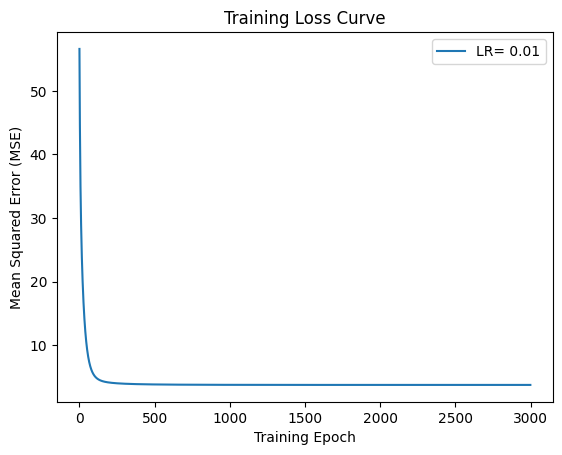

In [ ]:
plt.plot(range(len(mse_loss)), mse_loss, label='LR= 0.01')
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('Training Loss Curve')
plt.show()

You will now experiment with the batch gradient descent algorithm with different learning rate on the provided data.

Please train your model for up to 3000 iterations using different learning rate: $\gamma=10^{-i}$, $i=0,1,...,4$. For each learning rate, you can opt to stop early if it has converged (using the convergence threshold) or diverged (the loss start to grow larger).

For each converging (not necessarily converged yet) learning rate, please compute and report the MSE of the final learned weights on the validation data.

Also please provide a plot that shows the training loss curves (MSE as a function of the # of epochs) for all the converging learning rates. Please use different colors mark different learning rates and provide proper legends for your figure.


In [ ]:
# Define the data and other constants here
learning_rates = [10**-i for i in range(5)]

print(learning_rates)

losses_with_lr = []

# Create and fit the model for different learning rates
for lr in range(len(learning_rates)):
  model = BGDRegressor(epochs=3000, learning_rate=learning_rates[lr])
  mse_loss = model.fit(X_train_norm, y_train)
  losses_with_lr.append(mse_loss)
  y_pred = model.predict(X_val_norm)
  val_mse = mean_squared(y_val, y_pred)
  val_r2_score = calculate_r_squared(y_val , y_pred)
  print(f'Learning Rate : {learning_rates[lr]} | MSE_train : {mse_loss[-1]}| MSE_val : {val_mse} | R2-Score_val : {val_r2_score}')

for loss in losses_with_lr:
  print(f"Losses : {loss}")

[1, 0.1, 0.01, 0.001, 0.0001]


<ipython-input-22-e8a4e4dd92cf>:23: RuntimeWarning: overflow encountered in multiply
  coef_I = 2 * np.dot((y_hat - Y), X)/X.shape[0]


Learning Rate : 1 | MSE_train : nan| MSE_val : nan | R2-Score_val : nan
Learning Rate : 0.1 | MSE_train : 3.757887089954586| MSE_val : 4.503508105356861 | R2-Score_val : 0.689776496248762
Learning Rate : 0.01 | MSE_train : 3.757901724088935| MSE_val : 4.503488778870093 | R2-Score_val : 0.6897778275510058
Learning Rate : 0.001 | MSE_train : 3.9472084740536113| MSE_val : 4.693417251715777 | R2-Score_val : 0.6766946321997573
Learning Rate : 0.0001 | MSE_train : 15.498563013937574| MSE_val : 16.796763737886934 | R2-Score_val : -0.15704263799390294
Losses : [56.59562837719744, 1609.208074892424, 159902.98410055833, 16618764.057361865, 1732166544.5096972, 180600609535.4136, 18830675447701.543, 1963427059873504.5, 2.0472172426320413e+17, 2.134583395462357e+19, 2.2256779736968135e+21, 2.320660069158988e+23, 2.419695580999721e+25, 2.522957490706622e+27, 2.630626162199235e+29, 2.7428896565800824e+31, 2.8599440605748425e+33, 2.981993829024663e+35, 3.109252141999539e+37, 3.241941277152378e+39, 3.3

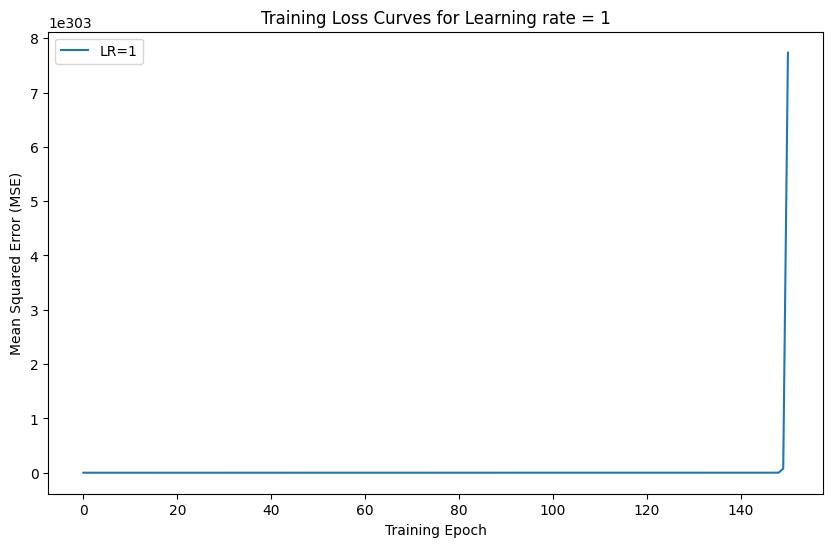

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses_with_lr[0])), losses_with_lr[0], label=f'LR={learning_rates[0]}')
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss Curves for Learning rate = 1')
plt.legend()
plt.show()

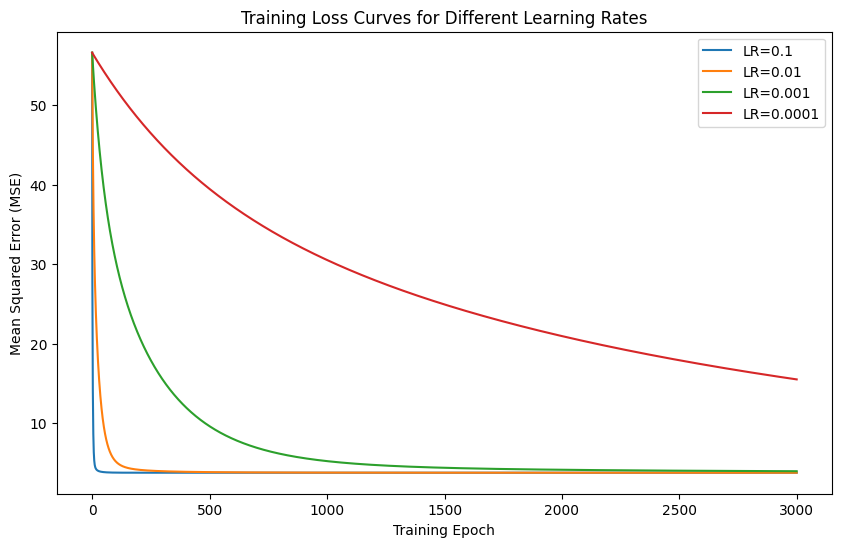

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(1, len(learning_rates)):
  plt.plot(range(len(losses_with_lr[i])), losses_with_lr[i], label=f'LR={learning_rates[i]}')
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss Curves for Different Learning Rates')
plt.legend()
plt.show()

## Question

Which learning rate leads to the best trainng and validation MSE respectively? Do you observe better training MSE tend to correpsond to better validation MSE? How is this different from the trend shown in slide 43 (titled danger of using training loss to select M) discussed in class regarding overfitting? Is there any issue with using training loss to pick learning rate in this case?

**Answer:**

*LR=0.1 and LR=0.01 lead to very similar results in the MSE. Regarding the training data, LR=0.01 leads to the best MSE (difference <0.01 between MSE_Test of LR=0.1 and LR=0.01). However, regarding the validation date, LR=0.1 leads to a slightly better MSE than LR=0.01 (also difference is <0.01). Apart from these two learning rates, whose results can be considered equal when rounded, there is a tendency for better Training MSE's to correspond to better Validation MSE's. Thus, in this case it is no problem to choose the learning rate based on the MSE's obtained with training data, it is even recommended. In contrast, slide 43 presents the case where the learning rate leading to the best training MSE corresponds to the worst test MSE.*

# Part 3. More exploration.

## **3(a). (20 pts) Normalization of features: what is the impact?**
In part 1, you were asked to perform z-score normalization of all the features except for binary ones. In this part, we will ask you to first conceptually think about what is the impact this operation on the solution and then use some experiments to varify your conceptual understanding.

### **Questions.**

The normalization process applies a linear transformation to each feature, where the transformed feature $x'$ is simply a linear function of original feature $x$: $x'=\frac{x-\mu}{\sigma}$.

Let's disect the influence of this transformation on our learned linear regression model.
1. How do you think this transformation will influnce the training and validation MSE we get for the closed-form solution? Why?
2. How do you think this will change the magnitude of the weights of the learned model? Why?
3. How do you think this will change the convergence behavior of the batch gradient descent algorithm? Why?

**Answer: <br>
1.How do you think this transformation will influnce the training and validation MSE we get for the closed-form solution? Why?**

*The z-score transformation, which normalizes features to have a mean of zero and a standard deviation of one, has a positive influence on both training and validation Mean Squared Error (MSE) in closed-form linear regression. Training MSE decreases due to the scaling, enabling the optimization process to find optimal weights for minimizing training error more effectively. Normalization also enhances the model's ability to generalize, reducing the risk of overfitting. This consistent scaling between training and validation data ensures that the model's performance is improved and stable across both datasets, resulting in a lower validation MSE, ultimately enhancing the model's overall accuracy.*

**2.How do you think this will change the magnitude of the weights of the learned model? Why?**

*The z-score normalization, expressed as $x$: $x'=\frac{x-\mu}{\sigma}$, significantly influences the magnitude of weights in a linear regression model. It reduces weight magnitudes by equalizing feature scales. Features originally on different scales may have weights with large magnitudes, leading to an inaccurate representation of feature importance. With normalization, weights become more interpretable; they reflect the relative impact of each feature on the target variable. Smaller weight magnitudes indicate less influence, and larger magnitudes signal more substantial impact. This transformation ensures that the model assigns weights proportional to the true importance of the features, regardless of their original scales, enhancing the model's interpretability and performance.*

**3. How do you think this will change the convergence behavior of the batch gradient descent algorithm? Why?**


*Z-score normalization, which scales features to have zero mean and unit variance, positively impacts the convergence behavior of the batch gradient descent algorithm. It fosters stable learning rates by preventing large-scale features from dominating the optimization process. This leads to faster convergence as balanced feature scales facilitate more consistent weight updates, reducing the risk of oscillations or slow convergence. Moreover, normalization mitigates issues related to vanishing or exploding gradients, making gradient updates more predictable. The uniform scaling of features simplifies hyperparameter tuning, as hyperparameters become less sensitive to feature scales. In essence, z-score normalization significantly improves the stability, speed, and efficiency of the gradient descent optimization process.*

Now please perform the following experiments to verify your answer to the above questions.
1. Apply closed-form solution to data that did not go through the feature normalization step, and report the learned weights and the resulting training and testing MSEs.
2. Apply gradient descent algorithm to data that did not go through the feature normalization step using different learning rate. Note that the learning rate used in previous section will no longer work here. You will need to search for an appropriate learning rate to get convergence. (Hint: this needs to be much much smaller than what was used in part 2). Plot your MSE loss curve as a function of the epochs once you identify a convergent learning rate.

Closed Form Solution for Unnormalised data

In [ ]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_val_mean = X_val.mean()
X_val_std = X_val.std()

mu_sigma_df = pd.DataFrame([X_train_mean, X_train_std, X_val_mean, X_val_std],
                         index=['X_train_mean', 'X_train_std', 'X_val_mean', 'X_val_std']).T
mu_sigma_df

,X_train_mean,X_train_std,X_val_mean,X_val_std
bedrooms,3.374125,0.962949,3.379500,0.860145
bathrooms,2.120656,0.764633,2.111750,0.767256
sqft_living,2077.684875,912.497634,2090.376500,906.822584
sqft_lot,15046.922875,41912.902601,15258.315500,38246.101269
floors,1.501250,0.543459,1.513500,0.539410
waterfront,0.006750,0.081886,0.008000,0.089107
view,0.229000,0.752084,0.231000,0.771321
condition,3.416375,0.656552,3.380000,0.640941
grade,7.659750,1.171816,7.727000,1.211282
sqft_above,1788.397750,831.414296,1811.905500,828.607014


In [ ]:
X_train = np.array(X_train)
X_val = np.array(X_val)

In [ ]:
lr_0 = LinearRegression()
lr_0.fit(X_train, y_train)

array([-7.49904594e+02,  9.56476705e+00, -3.38107410e+01,  9.79473483e-01,
       -6.98492890e-06,  1.30657476e+00,  6.54676309e+01, -3.14357256e+00,
        1.06949320e+00,  2.17084631e+00, -9.68631230e-01, -9.67039284e-01,
       -2.99656211e-02, -4.92850759e-03,  6.03499296e+00, -2.14196020e+00,
        2.09743484e-04, -3.37769944e-06, -5.88285404e-03,  1.75718208e-02,
        3.73189359e-01, -3.54965383e-03])

In [ ]:
y_pred01 = lr_0.predict(X_train)
train_rmse0 = np.mean((y_pred01 - y_train)**2)
train_rmse0

441.6765734274263

In [ ]:
y_pred02 = lr_0.predict(X_val)
val_rmse0 = np.mean((y_pred02 - y_val)**2)
val_rmse0

416.16870950015846

Applying Batch Gradient Descent Algorithm

In [ ]:
# Define the data and other constants here
learning_rates = [10**-i for i in range(1,5)]

print(learning_rates)

losses_with_lr0 = []

# Create and fit the model for different learning rates
for lr in range(len(learning_rates)):
  bgdr = BGDRegressor(epochs=3000, learning_rate=learning_rates[lr])
  mse_loss0 = bgdr.fit(X_train, y_train)
  losses_with_lr0.append(mse_loss0)
  y_pred0 = bgdr.predict(X_val)
  val_mse0 = mean_squared(y_val, y_pred0)
  val_r2_score0 = calculate_r_squared(y_val , y_pred0)
  print(f'Learning Rate : {learning_rates[lr]} | MSE : {val_rmse0} | R2 Score : {val_r2_score0}')

for loss in losses_with_lr0:
  print(f"Losses : {loss}")

[0.1, 0.01, 0.001, 0.0001]


<ipython-input-22-e8a4e4dd92cf>:23: RuntimeWarning: overflow encountered in multiply
  coef_I = 2 * np.dot((y_hat - Y), X)/X.shape[0]


Learning Rate : 0.1 | MSE : 416.16870950015846 | R2 Score : nan
Learning Rate : 0.01 | MSE : 416.16870950015846 | R2 Score : nan


<ipython-input-22-e8a4e4dd92cf>:21: RuntimeWarning: invalid value encountered in double_scalars
  self.intercept_ = self.intercept_ - (self.lr*intercept_I)


Learning Rate : 0.001 | MSE : 416.16870950015846 | R2 Score : nan
Learning Rate : 0.0001 | MSE : 416.16870950015846 | R2 Score : nan
Losses : [23095697115.66125, 8.497855622484087e+28, 3.4781691320600942e+47, 1.4314664852401099e+66, 5.892902100949298e+84, 2.4259566452677813e+103, 9.987047769626958e+121, 4.11141421403387e+140, 1.6925649356822593e+159, 6.96786047959542e+177, 2.8684914025895404e+196, 1.1808851441309853e+215, 4.861404577926888e+233, 2.0013169432900475e+252, 8.238914172430053e+270, 3.3917519645378363e+289, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

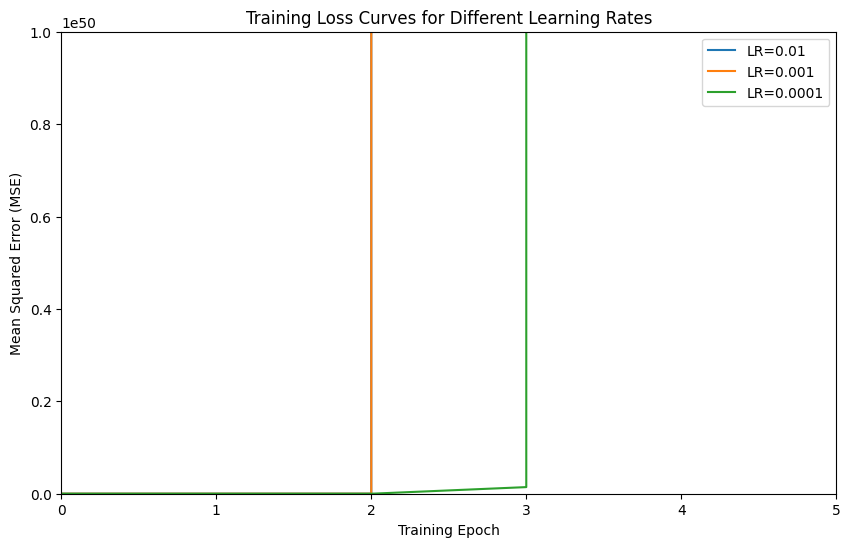

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(1, len(learning_rates)):
  plt.plot(range(len(losses_with_lr0[i])), losses_with_lr0[i], label=f'LR={learning_rates[i]}')
plt.xlim(0,5)
plt.ylim(0, 1e50)
plt.xlabel('Training Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Loss Curves for Different Learning Rates')
plt.legend()
plt.show()

**Questions**

Please revisit the questions above. Does your experiment confirm your expectation?  Can you provide explanations to the observed differences (or lack of differences) between the normalized data and unnormalized data? Based on these observations and your understanding of them, please comment on the benefits of normalizing the input features in learning for linear regressions.


**Answer:**
*The unnormalized data indeed results in significantly worse RMSE. This is primarily due to differences in feature scales, which can mislead the model. When features are not normalized, those with larger scales may dominate the regression. Normalization is essential as it promotes faster convergence in optimization, stabilizes gradient descent, and enhances interpretability. Regularization methods are also more effective with normalized features. In essence, normalizing input features significantly improves model accuracy and efficiency while ensuring that model interpretations are more accurate and consistent, making it a crucial step in the linear regression process.*

## **3(b). (20 pts) explore the impact of redundant features**

In the warm up exercise, you all have seen some features are highly correlated with one another. For example, there are multiple squared footage related features that are strongly correlated (e.g., *sqft_above* and *sqrt_living* has a correlation coefficient of 0.878).  This is referred to as multicollinearity phenomeon, where two or more features are correlated.

There are numerous consequences from multicollinearity. It makes it more challenging to estimate the weights of the features accurately. The weights may become unstable, and their interpretation becomes less clear.

In this part you will start with the pre-processed training set, and perform the following experiments **using the closed-form solution**.
Specifically, your code should:
1. randomly subsample 75% percent of the training data (with normalized features) for five times
2. creating five slighly different training sets that are 75% of the original training set size.
3. for each such training set, perform learning using the closed-form solution and report the learned weight vector in a table, where you can show each weight vector solution as a row (or column in the table), and include a header for your table to indicate the corresponding feature name for each weight coefficient.

In [ ]:
# Your code goes here
# Your code goes here
n_subsamples = 5
n_per_subsample = int(X_train_norm.shape[0]*0.75)
subsamples_x = []
subsamples_y = []

for _ in range(n_subsamples):
# Randomly select rows for subsample
  subsample_rows = np.random.choice(X_train_norm.shape[0],n_per_subsample,replace=False)

# Extract subsampled data
  subsample_x = X_train_norm[subsample_rows]
  subsample_y = y_train[subsample_rows]

# Store the subsampled data
  subsamples_x.append(subsample_x)
  subsamples_y.append(subsample_y)


subsamples_x = np.array(subsamples_x)
subsamples_y = np.array(subsamples_y)

# Shape of Subsampled Data
print("Subsampled X shape:", subsamples_x.shape)
print("Subsampled y shape:", subsamples_y.shape)

Subsampled X shape: (5, 6000, 21)
Subsampled y shape: (5, 6000)


In [ ]:
feature_names.insert(0,"Offset")

weight_coeff_table = pd.DataFrame(columns=feature_names)

for i in range(n_subsamples):
    # Fit linear regression using closed-form solution
    X = subsamples_x[i]
    y = subsamples_y[i]

    # Use closed-form solution to calculate weights for each subsample
    lr = LinearRegression()
    weights = lr.fit(X, y)

    # Add weights to the results DataFrame
    weight_coeff_table.loc[i] = weights

# Print the results table
pd.set_option('display.max_columns', None)
weight_coeff_table

,Offset,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year,age_since_renovated
0,5.418689,2.547526,-2.539019,9.548829,-0.565013,-1.408535,0.015822,1.249426,0.808542,-0.405369,-8.060144,-11.091786,-0.930076,-0.292548,0.842266,-0.339403,0.153283,-0.073866,-0.049937,0.063474,0.173088,-0.136399
1,5.367883,-0.004837,0.051088,1.740018,0.091140,-0.015400,0.316623,0.440628,0.194978,1.136580,-0.936910,-0.551930,-0.869980,-0.273555,0.826742,-0.318176,0.101734,-0.091664,-0.053395,0.059838,0.198414,-0.123481
2,5.356215,3.698216,4.700332,102.081987,-0.294168,-1.189966,0.238311,0.830912,0.121710,0.462664,-102.350555,-53.364145,-0.920640,-0.264494,0.836362,-0.310246,0.104739,-0.072304,-0.049456,0.054878,0.191468,-0.143653
3,5.328153,0.072148,-0.145866,1.210924,0.061260,0.089622,0.294738,0.452053,0.184374,1.144454,0.087083,-0.096236,-0.865939,-0.254114,0.817649,-0.259238,0.156508,-0.077466,-0.044568,0.072376,0.174643,-0.071635
4,5.330331,-1.641255,0.901285,2.014595,-0.040365,-0.552298,0.327337,0.545287,0.239350,1.010946,1.999564,0.683068,-0.938193,-0.227053,0.834776,-0.296252,0.154257,-0.095083,-0.051570,0.076955,0.180608,-0.168527


### **Questions**

Ideally, we would like the weight coefficient to be stable across slightly different runs. Which features have the most stable weights across different runs? Which features have the least stable weights across different runs? Can you relate the stability of the features in relation to the multicollinearity issue we have for this dataset?

**Your answer goes here.**

*The stability of the features for the different subsamples differs significantly. The following features have relatively stable results:
sqft_lot, waterfront, view, condition, grade, yr_built, zipcode, lat, long, day, month, year.
Every other feature has significant differences in magnitudes (factor >2) and/or different signs from subsample to subsample. The most unstable ones are bedrooms, bathrooms, floors, sqft_basement.*

*The stability of features is definitely related to their possible correlation with other features:
It is obvious that most of the stable features should be more or less independent (not strongly correlated) to most other features, e.g. the very beautiful located houses should on average not be in a better condition than elsewhere or be newer.
However, the least stable features such as number of bedrooms, bathrooms and floors do necesarrily correlate with most of the other unstable features. Probably that's the reason why they are so unstable.*

# Bonus. In-class competition (10 bonus pts)

We will host a in-class competition using the IA1 data, where you are encouraged to explore different ways to improve the prediction performance by manipunating the data. This could include: feature engineering such as removing, transforming features, constructing new features based on existing ones, using different encoding for the discrete features; data manipulation such as identifying and removing potential outliers; and target manipulation such as log transforming the price target. This is where you can get creative and test your ideas out.

To participate in this competition, use the following link:

https://www.kaggle.com/t/eae3afb743bd4140b6f5b6abbfe2a0e8


You should continue working in the same team for this competition. The training and validation data provided on the kaggle site are the same as the IA1 assignment. To participate, you will need to train your model and apply it to testing data provided on kaggle, and submit prediction files to be scored.

Your scoring will have two parts, the performance on the public leader board as well as the private leader board. The results on the public leader board is visible through out the competition so that you can gauge how well your model is performing in comparison to others. The private leader board shows the final evaluation performance and will be released only once after the competition is closed.

Each team will be allowed to submit 3 final entries to be evaluated. You can use the public leaderboard performance to pick which models to use for your final evaluation entries.

**Assginment of the bonus points:**

**Performance bonus:** the top 3 teams on the private leader board will recieve 10 bonus points.

**Participation bonus:** the 5 teams that submitted the most entries (with different performances) will recieve 5 bonus points. Also any team that participated the competition and got non-trivial performance will receive 2 bonus points.

Bonus points are capped at 10.


**Please provide the team name on the kaggle competition. Leave it blank if you opt not to participate.**